In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from bamt.networks.continuous_bn import ContinuousBN
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.cluster import KMeans
import pickle
import math
import sys
import random

In [20]:
def square_list(L, N):
    deltas = np.zeros(L)
    deltas[0] = (np.random.uniform(-N, N))
    i = 1
    while i < L and np.sum(np.array(deltas)**2) < N**2:
        deltas[i] = (np.random.uniform(-np.sqrt(N**2 - np.sum(np.array(deltas)**2)),\
                                    np.sqrt(N**2 - np.sum(np.array(deltas)**2))))
        i += 1
    return deltas

In [21]:
def assort(data):
    data['norm'] = data.apply(np.linalg.norm, axis=1)
    for c in data.columns[0:-1]:
        data[c] = data[c] / data['norm']
    data = data.drop(columns=['norm'])
    mean_assort = []
    data = data.values
    for attr_i in data:
        for attr_j in data:
            mean_assort.append(np.dot(attr_i,attr_j))
    return round(np.mean(mean_assort), 1)

In [68]:
D = [2, 3, 4, 6, 10, 20, 30, 80, 100]
target_assort = [0.1, 0.9]
result = pd.DataFrame(columns = ['target', 'deviation', 'nodes'])
N = 0.5
for _ in range(10):
    for target in target_assort:
        for d in D:
            var = (target - N) / d
            var_list = [var]*d 
            sum_mu = target - d*var
            mu_list = square_list(d, math.sqrt(sum_mu))
            cov_matrix = np.random.uniform(-0.05,0.05,size=(d,d))
            np.fill_diagonal(cov_matrix, var)
            X = pd.DataFrame(np.random.multivariate_normal(mu_list, cov_matrix, 1000))
            result = pd.concat([result, pd.DataFrame.from_dict({'target':[target], 'deviation':[abs(target-assort(X))], 'nodes':[d]})], ignore_index=True)
            

        

<AxesSubplot: xlabel='nodes', ylabel='deviation'>

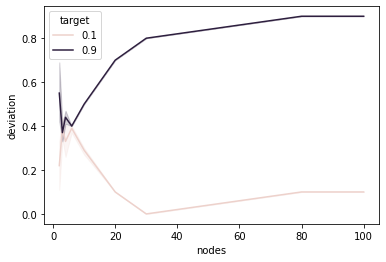

In [69]:
import seaborn as sns

sns.lineplot(x='nodes', y = 'deviation', hue='target', data=result)

In [7]:
p_i = 0.05
gaussian = []
bn = []
number_of_atr = [3, 5, 8, 10, 20, 30, 80, 100, 150, 200]
for n in number_of_atr:
    G = []
    is_all = True
    while is_all == True:
        G=nx.gnp_random_graph(n,p_i,directed=True)
        G = nx.DiGraph([(u,v) for (u,v) in G.edges() if u<v])
        if len(G.nodes) == n:
            is_all =False
    gaussian.append(((n*(n+1)) / 2) + n)
    number_params = 0
    for v in G.nodes:
        if G.pred[v]:
            number_params += len(G.pred[v]) + 2
        else:
            number_params += 2
    bn.append(number_params)
    

In [2]:
file1 = open('../nets/G_50_0.1_2.5_5.txt', 'r')
Lines = file1.readlines()

In [4]:
df = pd.DataFrame(columns=['v1', 'v2'])
for i, l in enumerate(Lines):
    l = l.rstrip()
    df.loc[i,'v1'] = l.split(',')[0]
    df.loc[i,'v2'] = l.split(',')[1]



In [5]:
df

v1  v2
0     0  28
1     0  35
2     0  11
3     0  14
4     0  48
..   ..  ..
120  38  40
121  38  43
122  40  44
123  46  48
124  47  49

[125 rows x 2 columns]

In [12]:
net1 = pd.read_csv('../nets/G_40_1.csv')


In [ ]:
net_edges = net1.values


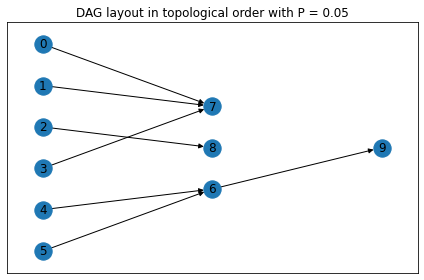

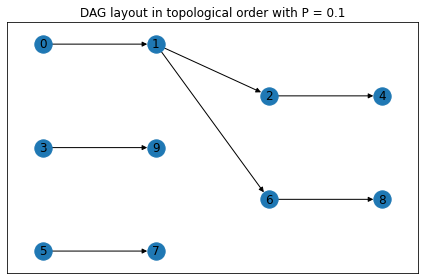

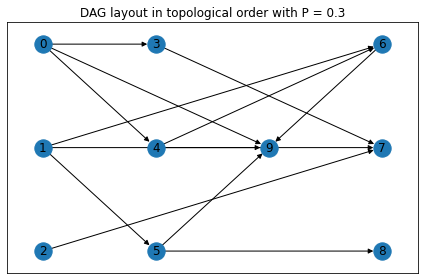

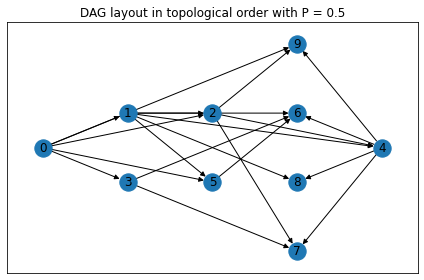

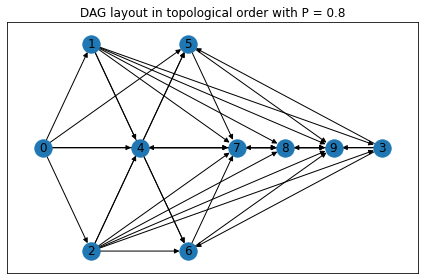

In [5]:
number_of_atr = 10
p = [0.05, 0.1,0.3,0.5,0.8]
for p_i in p:
    G = []
    is_all = True
    while is_all == True:
        G=nx.gnp_random_graph(number_of_atr,p_i,directed=True)
        G = nx.DiGraph([(u,v) for (u,v) in G.edges() if u<v])
        if len(G.nodes) == number_of_atr:
            is_all =False
    for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
        for node in nodes:
            G.nodes[node]["layer"] = layer

    # Compute the multipartite_layout using the "layer" node attribute
    pos = nx.multipartite_layout(G, subset_key="layer")
    fig, ax = plt.subplots()
    nx.draw_networkx(G, pos=pos, ax=ax)
    ax.set_title("DAG layout in topological order with P = " + str(p_i))
    fig.tight_layout()
    fig.savefig('img/'+str(p_i)+'.jpg')

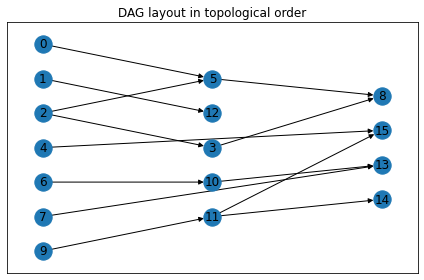

In [43]:
for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G, subset_key="layer")

fig, ax = plt.subplots()
nx.draw_networkx(G, pos=pos, ax=ax)
ax.set_title("DAG layout in topological order")
fig.tight_layout()
plt.show()

In [26]:
df1 = pd.read_csv('4 20 0.8 0.9 exp1.csv')
df1

Number of atr  P_edge  Target assort  Time  Deviation
0                3    0.05            0.3     4        0.1
1                3    0.05            0.9     6        0.0
2                3    0.10            0.3     4        0.0
3                3    0.10            0.9     5        0.0
4                3    0.50            0.3     4        0.0
..             ...     ...            ...   ...        ...
155             20    0.10            0.9     7        0.0
156             20    0.50            0.3     7        0.0
157             20    0.50            0.9    11        0.0
158             20    0.80            0.3     5        0.2
159             20    0.80            0.9    10        0.0

[160 rows x 5 columns]

In [27]:
df2 = pd.read_csv('0 30 0.5 0.9 exp1.csv')
df2

Number of atr  P_edge  Target assort  Time  Deviation
0               8    0.05            0.3     6        0.0
1               8    0.05            0.9     6        0.0
2               8    0.10            0.3     5        0.0
3               8    0.10            0.9     6        0.1
4               8    0.50            0.3     6        0.1
5               8    0.50            0.9     7        0.0
6               8    0.80            0.3     6        0.0
7               8    0.80            0.9     7        0.0
8              15    0.05            0.3     6        0.0
9              15    0.05            0.9     7        0.0
10             15    0.10            0.3     6        0.0
11             15    0.10            0.9     9        0.1
12             15    0.50            0.3     5        0.1
13             15    0.50            0.9     6        0.0
14             15    0.80            0.3     6        0.0
15             15    0.80            0.9     7        0.0
16             20    0.05            0.3     6        0.1
17             20    0.05            0.9     6        0.1
18             20    0.10            0.3     6        0.0
19             20    0.10            0.9     6        0.0
20             20    0.50            0.3     7        0.0
21             20    0.50            0.9     9        0.1
22             20    0.80            0.3     9        0.2
23             20    0.80            0.9    10        0.6
24             25    0.05            0.3     6        0.0
25             25    0.05            0.9    11        0.0
26             25    0.10            0.3     6        0.0
27             25    0.10            0.9     6        0.0
28             25    0.50            0.3     7        0.0
29             25    0.50            0.9    11        0.0
30             25    0.80            0.3    58        0.1
31             25    0.80            0.9    61        0.5
32             30    0.05            0.3     6        0.0
33             30    0.05            0.9    10        0.0
34             30    0.10            0.3     6        0.1
35             30    0.10            0.9     7        0.0
36             30    0.50            0.3     7        0.0
37             30    0.50            0.9    15        0.1

In [28]:
df = pd.concat([df1, df2])
df.reset_index(inplace=True)
df = df.loc[df['Number of atr'] <= 20]

In [29]:
df_low = df.loc[df['Target assort'] == 0.3]
df_low

index  Number of atr  P_edge  Target assort  Time  Deviation
0        0              3    0.05            0.3     4        0.1
2        2              3    0.10            0.3     4        0.0
4        4              3    0.50            0.3     4        0.0
6        6              3    0.80            0.3     4        0.0
8        8              8    0.05            0.3     6        0.1
..     ...            ...     ...            ...   ...        ...
174     14             15    0.80            0.3     6        0.0
176     16             20    0.05            0.3     6        0.1
178     18             20    0.10            0.3     6        0.0
180     20             20    0.50            0.3     7        0.0
182     22             20    0.80            0.3     9        0.2

[92 rows x 6 columns]

In [30]:
df_high = df.loc[df['Target assort'] == 0.9]
df_high

index  Number of atr  P_edge  Target assort  Time  Deviation
1        1              3    0.05            0.9     6        0.0
3        3              3    0.10            0.9     5        0.0
5        5              3    0.50            0.9     4        0.0
7        7              3    0.80            0.9     5        0.0
9        9              8    0.05            0.9     7        0.0
..     ...            ...     ...            ...   ...        ...
175     15             15    0.80            0.9     7        0.0
177     17             20    0.05            0.9     6        0.1
179     19             20    0.10            0.9     6        0.0
181     21             20    0.50            0.9     9        0.1
183     23             20    0.80            0.9    10        0.6

[92 rows x 6 columns]

In [23]:
df = pd.read_csv('results/paper/4 50 0.2 0.9 G_50_0.3_1.5_20 exp3.csv')
df

Number of atr  P_edge  Target assort        Time  Deviation  Cluster  \
0               10    0.05            0.3   47.197329        0.0      0.4   
1               10    0.05            0.9   72.671552        0.1      0.4   
2               10    0.20            0.3   62.274992        0.1      0.4   
3               10    0.20            0.9   76.247378        0.0      0.4   
4               50    0.05            0.3  211.252177        0.1      0.4   
..             ...     ...            ...         ...        ...      ...   
155             10    0.20            0.9   75.538020        0.0      0.3   
156             50    0.05            0.3  196.740712        0.1      0.3   
157             50    0.05            0.9  290.605226        0.1      0.3   
158             50    0.20            0.3  273.254299        0.1      0.3   
159             50    0.20            0.9  328.079547        0.0      0.3   

     Path length  Node degree  
0            2.0           10  
1            2.0           10  
2            2.0           10  
3            2.0           10  
4            2.0           10  
..           ...          ...  
155          1.5           20  
156          1.5           20  
157          1.5           20  
158          1.5           20  
159          1.5           20  

[160 rows x 8 columns]

In [3]:
df_high_target = df.loc[df['Target assort'] == 0.9]

In [4]:
df_low_target = df.loc[df['Target assort'] == 0.3]

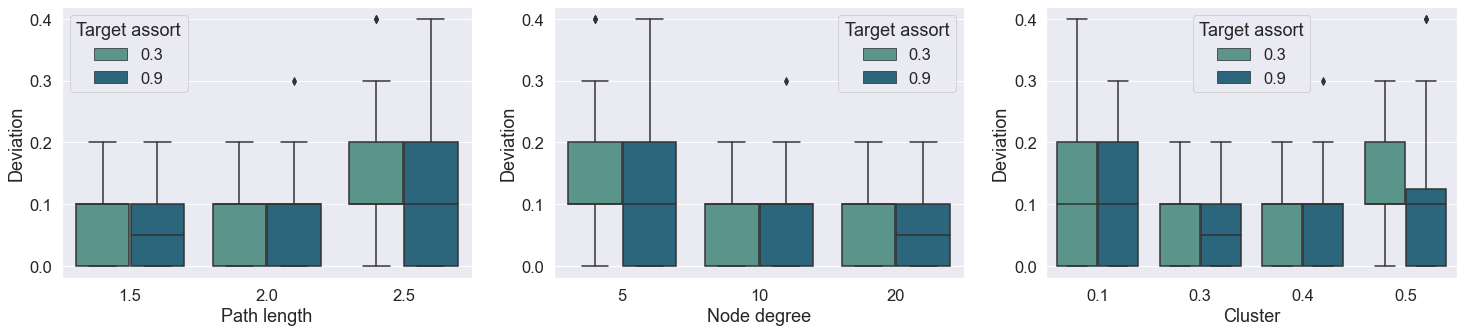

In [25]:
sns.set(font_scale=1.5)
pallette = sns.color_palette("crest", 2)
fig, ax = plt.subplots(1,3, figsize=(25,5))
sns.boxplot(ax=ax[0], x='Path length', y='Deviation', hue='Target assort' ,data=df, palette=pallette)
sns.boxplot(ax=ax[1], x='Node degree', y='Deviation',  hue='Target assort', data=df, palette=pallette)
sns.boxplot(ax=ax[2], x='Cluster', y='Deviation',  hue='Target assort', data=df, palette=pallette)
# palette = sns.color_palette("mako_r", 4)
# sns.boxplot(ax=ax[0, 1],x='Node degree', y='Deviation', data=df_low_target, palette=palette)
# sns.boxplot(ax=ax[1,1],x='Cluster', y='Deviation', data=df_low_target, palette=palette)
# sns.boxplot(ax=ax[2,1],x='Path length', y='Deviation', data=df_low_target, palette=palette)
# ax[0,1].set_title('Target assortativity = '+str(0.3))
plt.savefig('feature_graph_atr.pdf')

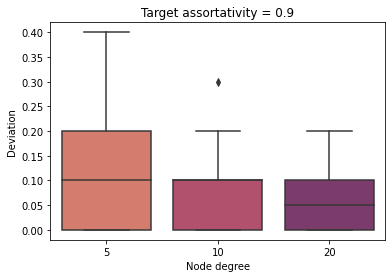

In [106]:
pallette = sns.color_palette("flare", 3)


sns.boxplot(x='Node degree', y='Deviation', data=df_high_target, palette=pallette)
plt.title('Target assortativity = '+str(0.9))
plt.savefig('nd_09.pdf')

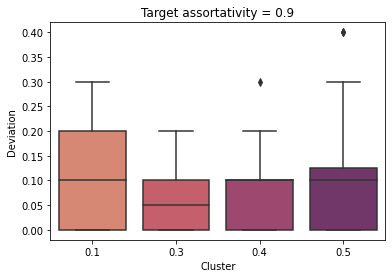

In [107]:
pallette = sns.color_palette("flare", 4)

sns.boxplot(x='Cluster', y='Deviation', data=df_high_target, palette=pallette)
plt.title('Target assortativity = '+str(0.9))
plt.savefig('cl_09.pdf')

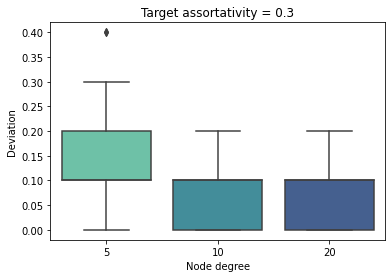

In [108]:
palette = sns.color_palette("mako_r", 4)
sns.boxplot(x='Node degree', y='Deviation', data=df_low_target, palette=palette)
plt.title('Target assortativity = '+str(0.3))
plt.savefig('nd_03.pdf')

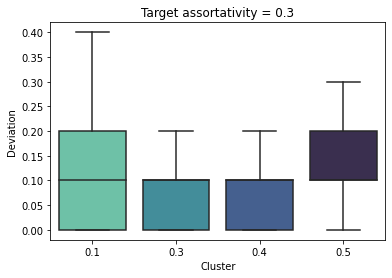

In [109]:
palette = sns.color_palette("mako_r", 4)
sns.boxplot(x='Cluster', y='Deviation', data=df_low_target, palette=palette)
plt.title('Target assortativity = '+str(0.3))
plt.savefig('cl_03.pdf')

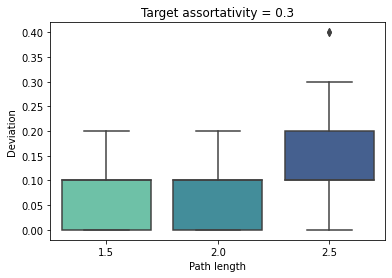

In [110]:
palette = sns.color_palette("mako_r", 4)
sns.boxplot(x='Path length', y='Deviation', data=df_low_target, palette=palette)
plt.title('Target assortativity = '+str(0.3))
plt.savefig('pl_03.pdf')

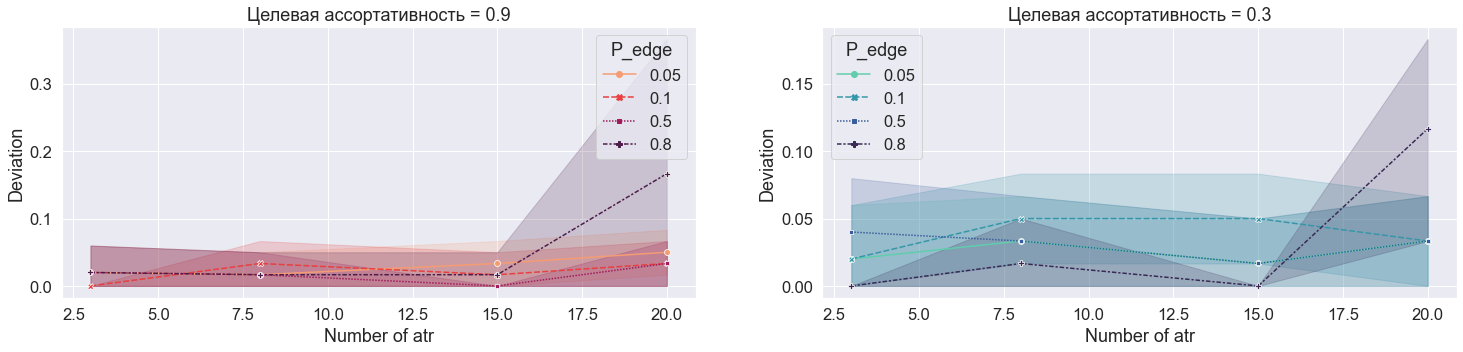

In [31]:
sns.set(font_scale=1.5)
palette = sns.color_palette("rocket_r", 4)
fig, ax = plt.subplots(1,2, figsize=(25,5))
ax[0].set_title('Целевая ассортативность = '+str(0.9))
sns.lineplot(ax=ax[0], x='Number of atr', y='Deviation', hue='P_edge', data=df_high, palette=palette,style='P_edge', markers=True)
palette = sns.color_palette("mako_r", 4)
ax[1].set_title('Целевая ассортативность = '+str(0.3))
sns.lineplot(ax=ax[1], x='Number of atr', y='Deviation', hue='P_edge', data=df_low, palette=palette,style='P_edge', markers=True)
fig.savefig('full_atr.pdf')

<AxesSubplot: title={'center': 'Целевая ассортативность = 0.3'}, xlabel='Number of atr', ylabel='Time'>

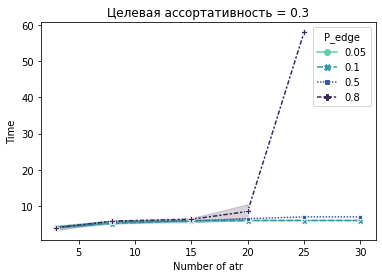

In [17]:
palette = sns.color_palette("mako_r", 4)
plt.title('Целевая ассортативность = '+str(0.3))
sns.lineplot(x='Number of atr', y='Time', hue='P_edge', data=df_low, palette=palette,style='P_edge', markers=True)

<AxesSubplot: xlabel='P_edge', ylabel='Deviation'>

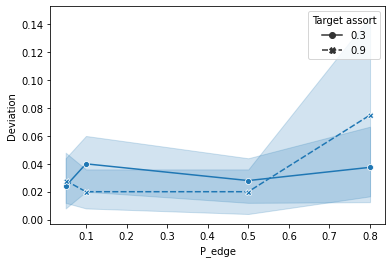

In [18]:

palette = sns.color_palette("coolwarm", as_cmap=True)
sns.lineplot(x='P_edge', y='Deviation', data=df, palette=palette,style='Target assort', markers=True)

<AxesSubplot:xlabel='P_edge', ylabel='Time'>

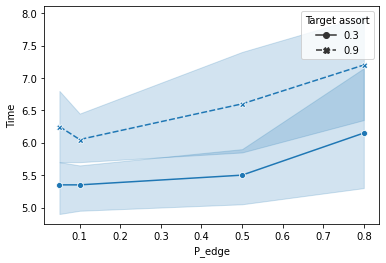

In [32]:
palette = sns.color_palette("coolwarm", as_cmap=True)
sns.lineplot(x='P_edge', y='Time', data=df, palette=palette,style='Target assort', markers=True)

In [25]:
df = pd.read_csv('results/4 16 0.8 0.9 exp1.csv')

<AxesSubplot: xlabel='Target assort', ylabel='Deviation'>

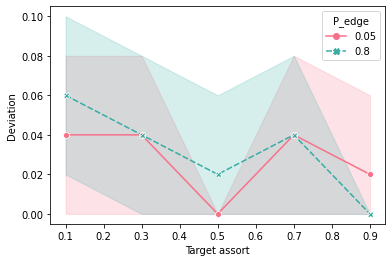

In [37]:
palette = sns.color_palette("husl", 2)
sns.lineplot(x='Target assort', y='Deviation', hue='P_edge', data=df, palette=palette,style='P_edge', markers=True)

In [119]:
bn = ContinuousBN(use_mixture=False)
bn.load('results/2 16 0.8 0.1 exp1.json')

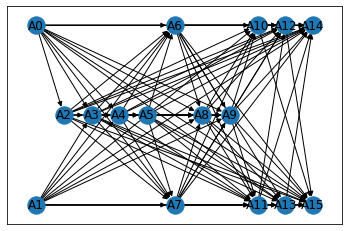

In [99]:
G = nx.DiGraph(bn.edges)
for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
        for node in nodes:
            G.nodes[node]["layer"] = layer

    # Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G, subset_key="layer")
fig, ax = plt.subplots()
nx.draw_networkx(G, pos=pos, ax=ax)

In [120]:
sample = bn.sample(500)


100%|██████████| 500/500 [00:00<00:00, 683.68it/s]


In [121]:
sample_tr = sample.transpose()

In [122]:
c = sample_tr.index
c

Index(['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15'],
      dtype='object')

In [124]:
pca = PCA(n_components=3)
components = pd.DataFrame(pca.fit_transform(sample_tr), columns=['x', 'y', 'z'])

fig = px.scatter_3d(
    components, x='x', y='y', z='z',color=c
)

fig.show()

In [216]:
components

0          1           2
0   -222.687880  75.020705  -22.213213
1   -231.235852  56.399352   16.618021
2   -160.846876 -41.622243   14.581172
3   -188.234947 -17.707353    8.904719
4   -204.145627  40.981572  114.891305
5   -195.858636 -12.219525   12.696029
6   -178.008481 -15.203898   14.693910
7   -264.413703 -52.102181   14.391013
8   -240.470794  77.736153  -37.310883
9   -250.534186  71.023307  -20.361675
10  -201.866510  -0.269079    2.846414
11  -198.731439 -45.573592  -74.114705
12  -165.217372 -72.674446   -3.807849
13  -159.880938 -51.902742   26.142657
14  -184.935834 -34.026635   49.004716
15  -220.120595  21.807112   -7.174305
16  -217.211544 -13.053924  -12.423387
17  -232.784112  46.222294   -8.089583
18  -156.794410 -24.122698   19.418436
19  -203.407668  21.916695    3.280880
20  -168.795153 -57.922506  -62.559327
21  -188.259613 -49.224499   -5.574362
22  -220.714540  29.425975  -25.553726
23  -235.210608  42.816530  -17.440688
24  4890.367318   4.275625   -0.845566

<AxesSubplot: >

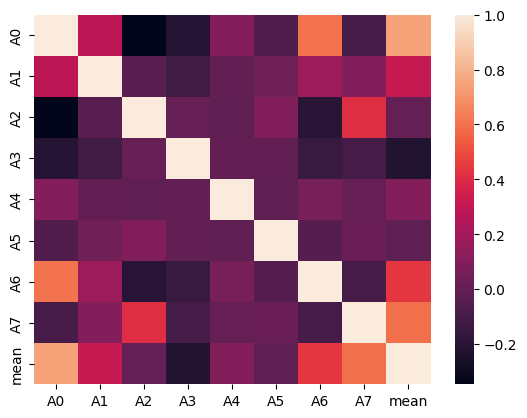

In [100]:
sns.heatmap(sample.corr())

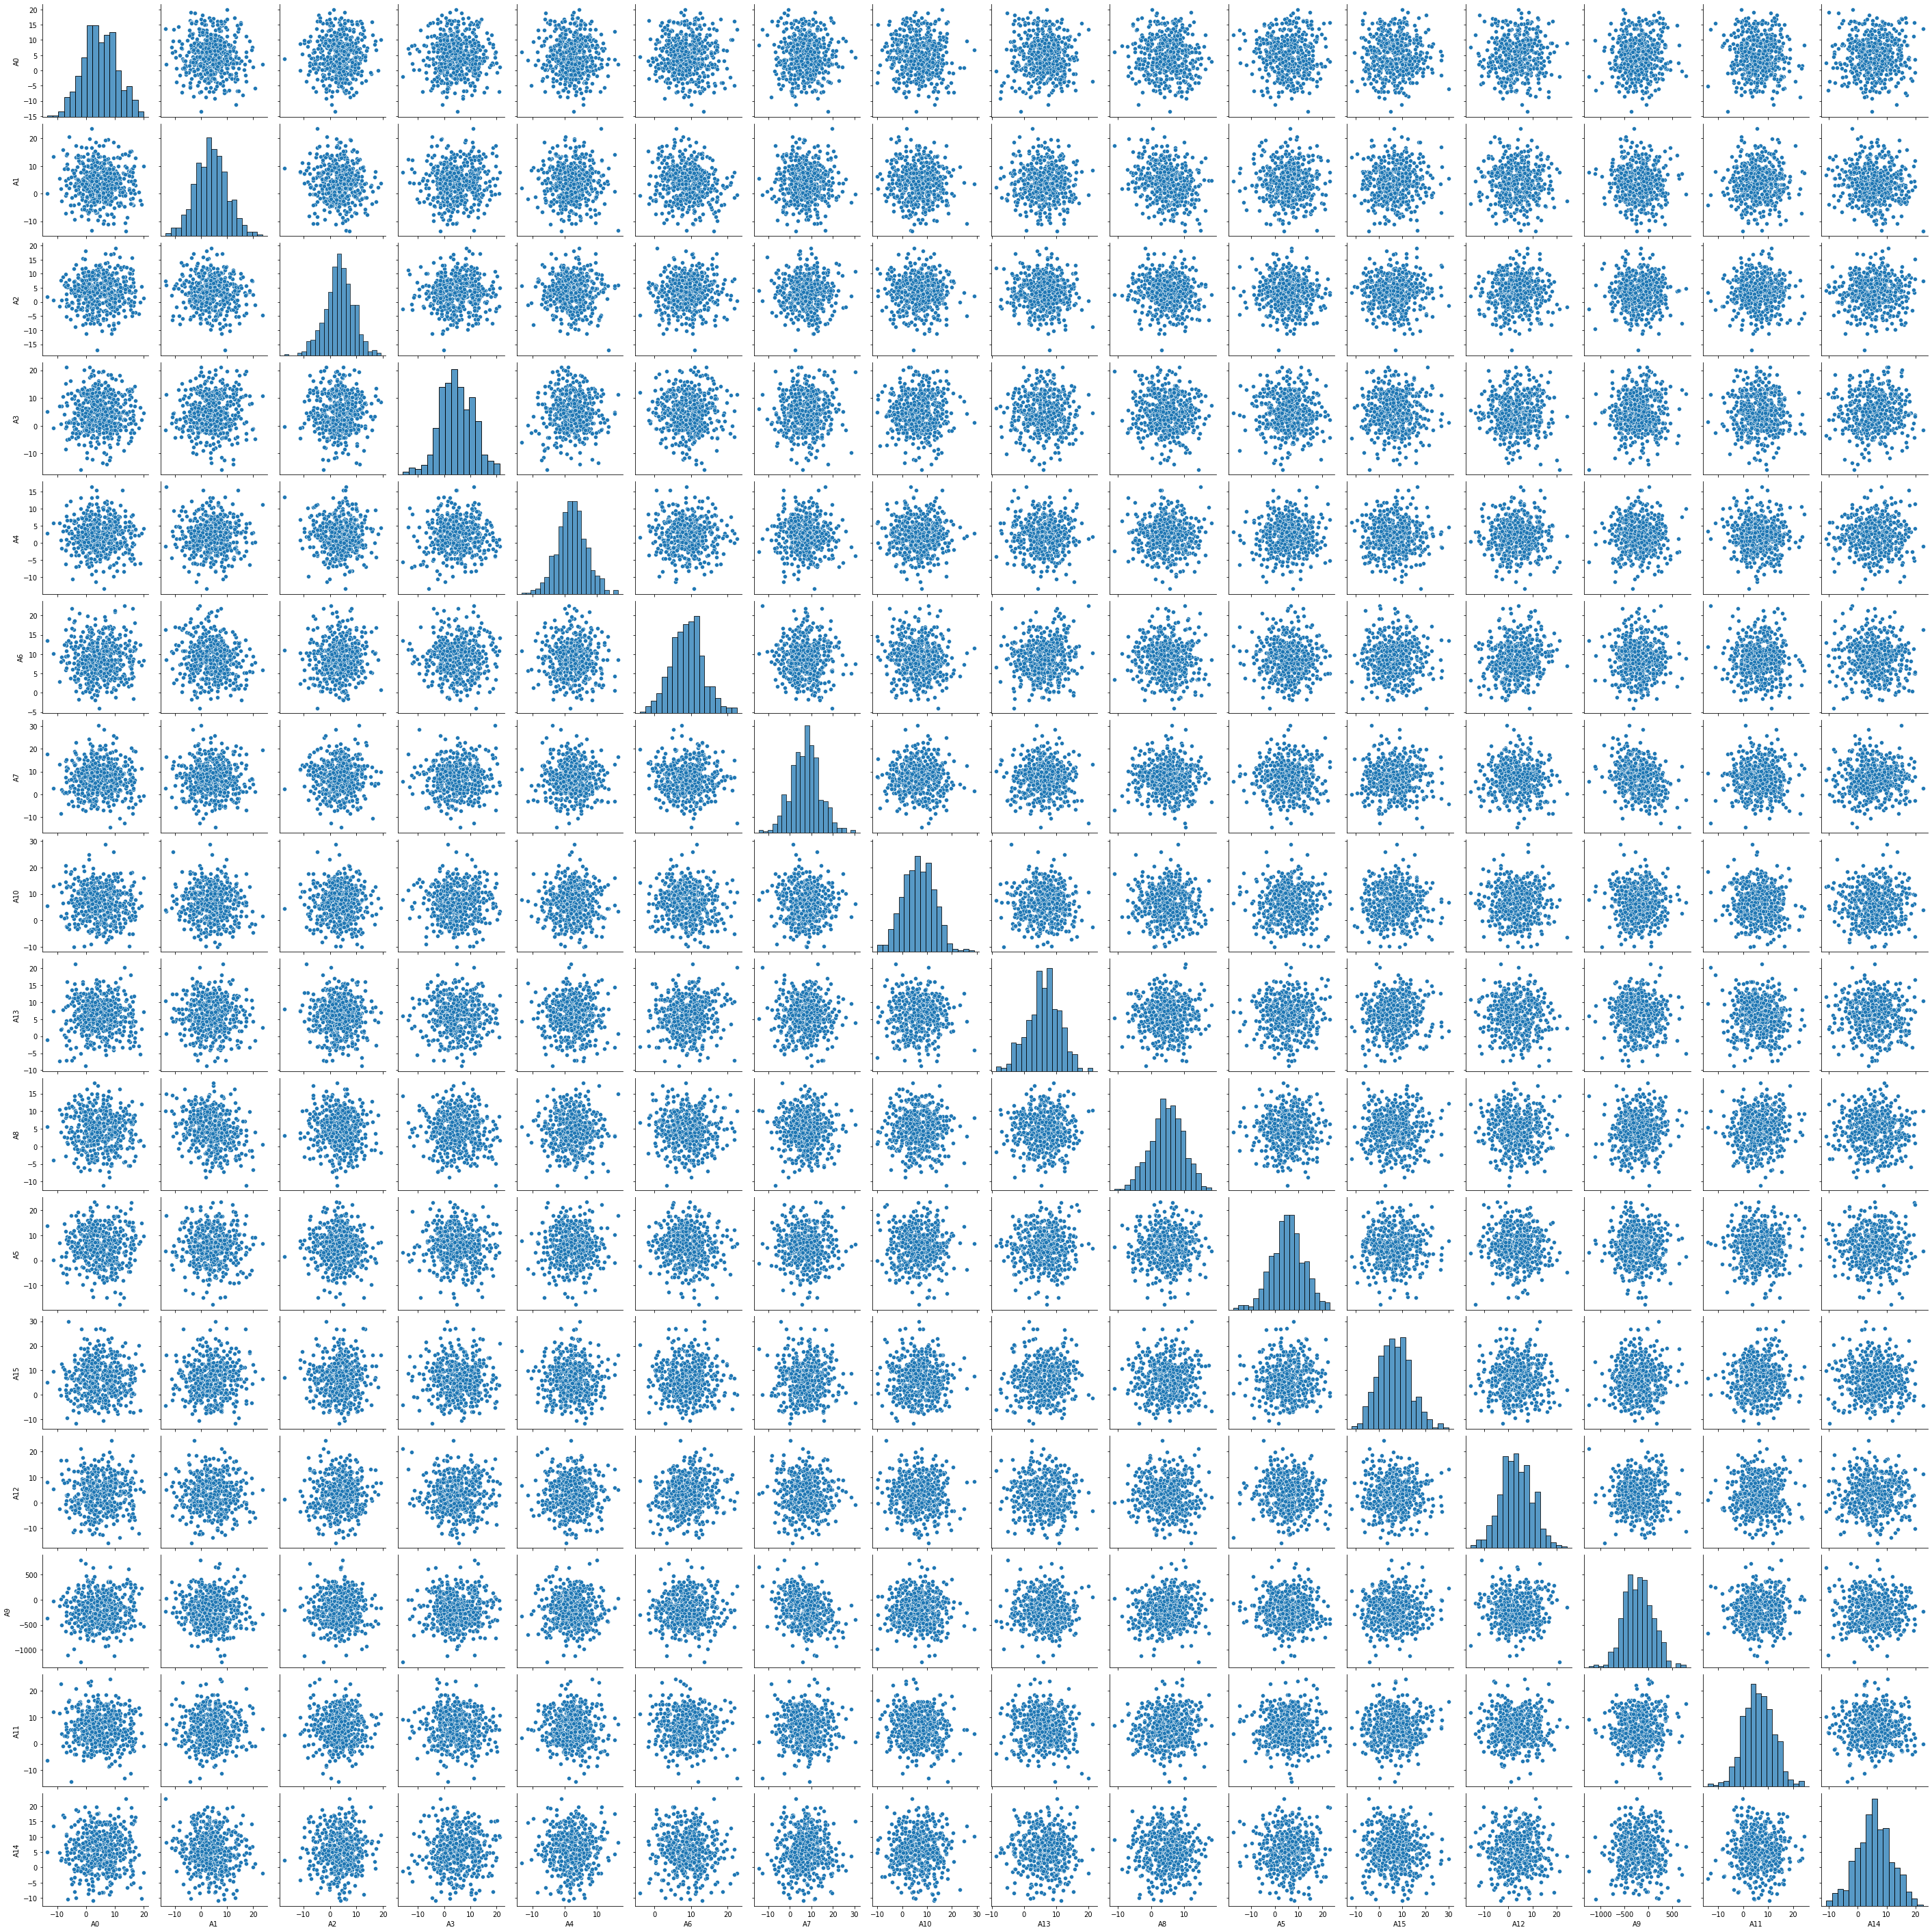

In [50]:
sns.pairplot(sample)

In [132]:
from sklearn.preprocessing import MinMaxScaler
number_of_atr = [16]
p_edge = [0.05, 0.8]
target_assort = [0.1, 0.3, 0.5, 0.7, 0.9]
df_result = pd.DataFrame(columns=['Target assort', 'P_edge', 'Mean attr distance'])
for _ in range(5):
    for p_i in p_edge:
        for target in target_assort:
            bn = ContinuousBN(use_mixture=False)
            bn.load('results/'+str(_)+' '+str(16)+' '+str(p_i)+' '+str(target)+' exp1.json')
            sample = bn.sample(500)
            sample_tr = sample.transpose()
            pca = PCA(n_components=3)
            components = pd.DataFrame(pca.fit_transform(sample_tr), columns=['x', 'y', 'z'])
            scaler = MinMaxScaler()
            components =pd.DataFrame(scaler.fit_transform(components), columns=['x', 'y', 'z']) 
            mean_dist = 0
            for i in components.index:
                for j in components.index:
                    mean_dist += np.linalg.norm(components.loc[i,:].values-components.loc[j,:].values)
            df_dict = pd.DataFrame({'Target assort':target, 'P_edge':p_i, 'Mean attr distance':mean_dist/components.shape[0]}, index=[0])
            df_result = pd.concat([df_result, df_dict], ignore_index=True)
            

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:00<00:00, 708.08it/s]


<AxesSubplot: xlabel='Target assort', ylabel='Mean attr distance'>

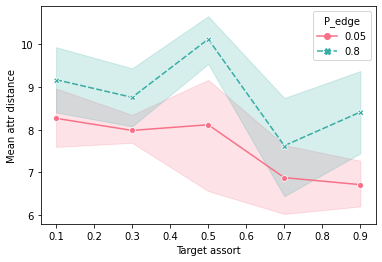

In [133]:
palette = sns.color_palette("husl", 2)
sns.lineplot(x='Target assort', y='Mean attr distance', hue='P_edge', data=df_result, palette=palette,style='P_edge', markers=True)

## Эксперимент 2

In [2]:
def model_assortativity(bn, synthetic_graph):
    
    data = bn.sample(40)
    data['norm'] = data.apply(np.linalg.norm, axis=1)
    for c in data.columns[0:-1]:
        data[c] = data[c] / data['norm']
    data = data.drop(columns=['norm'])
    mean_assort = []
    data = data.values
    for edge in synthetic_graph:
        i = edge[0]
        j = edge[1]
        mean_assort.append(np.dot(data[i], data[j]))
    return round(np.mean(mean_assort), 1)


In [3]:
from bamt.networks.continuous_bn import ContinuousBN
import math
df_result = pd.DataFrame(columns=['Graph', 'Number of atr', 'Target assort', 'Deviation', 'Calculated assort'])
number_of_atr = [10, 30, 50]
p_edge = [0.1]
target_assort = [0.1, 0.3, 0.5, 0.7, 0.9]
for _ in range(5):
    for n in number_of_atr:
        for p_i in p_edge:
            for target in target_assort:
                synthetic_graph = pd.read_csv('../nets/G_40_1'+'.csv')
                synthetic_graph = synthetic_graph.values
                for ni in range(2,6):
                    graph = pd.read_csv('../nets/G_40_'+str(ni)+'.csv')
                    graph = graph.values
                    bn = ContinuousBN()
                    bn.load('results/'+str(_)+' '+str(n)+' '+str(p_i)+' '+str(target)+' exp2.json')
                    ideal_assort = model_assortativity(bn, synthetic_graph=synthetic_graph)
                    calculated = model_assortativity(bn, synthetic_graph=graph)
                    df_dict = pd.DataFrame({'Graph':'G_40_'+str(ni), 'Number of atr': n, 'Target assort':target, 'Deviation':math.fabs(ideal_assort - calculated), 'Calculated assort':calculated}, index=[0])
                    df_result = pd.concat([df_result, df_dict], ignore_index=True)

                    

  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [00:00<00:00, 364.51it/s]


In [4]:
df_result

Graph Number of atr  Target assort  Deviation  Calculated assort
0    G_40_2            10            0.1        0.1                0.0
1    G_40_3            10            0.1        0.0                0.1
2    G_40_4            10            0.1        0.0               -0.0
3    G_40_5            10            0.1        0.1                0.2
4    G_40_2            10            0.3        0.0                0.3
..      ...           ...            ...        ...                ...
295  G_40_5            50            0.7        0.3                0.4
296  G_40_2            50            0.9        0.0                0.9
297  G_40_3            50            0.9        0.0                0.8
298  G_40_4            50            0.9        0.0                0.8
299  G_40_5            50            0.9        0.1                0.8

[300 rows x 5 columns]

<AxesSubplot: ylabel='Density'>

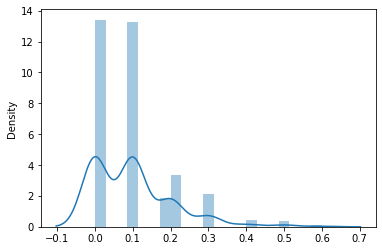

In [5]:
sns.distplot(df_result['Deviation'].values)

<AxesSubplot: xlabel='Graph', ylabel='Deviation'>

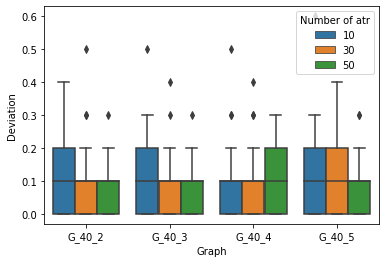

In [6]:
sns.boxplot(x='Graph', y='Deviation', hue='Number of atr', data=df_result)